In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tct import tct

In [2]:
metadata, data = tct.read("data/hvsccan20190628_2")

In [3]:
metadata

{'filetype': 82,
 'day': 28,
 'month': 6,
 'year': 2019,
 'hour': 16,
 'minutes': 51,
 'seconds': 9,
 'abstime': 3644578304.0,
 'x0': -17795.001953125,
 'dx': 4.699999809265137,
 'nx': 1,
 'y0': 8399.990234375,
 'dy': 2.0,
 'ny': 1,
 'z0': 31200.501953125,
 'dz': 1.0,
 'nz': 1,
 'time': datetime.datetime(2019, 6, 28, 16, 51, 9),
 'wfonoff': [1, 0, 0, 0],
 'nu1': 21,
 'u1': array([-20. , -21.5, -23. , -24.5, -26. , -27.5, -29. , -30.5, -32. ,
        -33.5, -35. , -36.5, -38. , -39.5, -41. , -42.5, -44. , -45.5,
        -47. , -48.5, -50. ], dtype=float32),
 'nu2': 1,
 'u2': array([0.], dtype=float32),
 't0': 0.0,
 'dt': 4.000000059604645e-10,
 'NP': 1252,
 'T': 0.0,
 'source': 0,
 'user': '',
 'sample': '',
 'comment': ''}

In [4]:
import xarray
chs_on = np.argwhere(metadata['wfonoff']).squeeze() + 1
nch = sum(metadata['wfonoff'])

In [5]:
import pandas as pd

In [6]:
data = pd.DataFrame({'u1': data['u1'], 'ch1':np.min(data['ch1'], axis=1)})

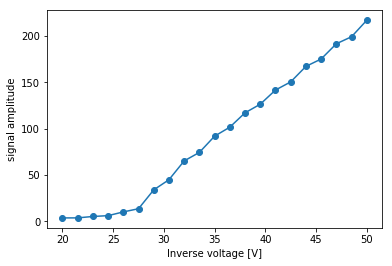

In [8]:
fig, ax = plt.subplots()
ax.plot(-data['u1'], -data['ch1'], 'o-')
ax.set_xlabel('Inverse voltage [V]')
ax.set_ylabel('signal amplitude')
fig.savefig('gain.pdf')